In [1]:
import numpy as np
from sdm_ml.dataset import BBSDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sparse_gp.kernels.rbf_kernel import RBFKernel
from sparse_gp.likelihoods.bernoulli_logit_likelihood import BernoulliLogitLikelihood
from sparse_gp.inference.laplace_inference import LaplaceInference

In [2]:
csv_folder = '../../../multi_species/bbs/dataset/csv_bird_data/'
dataset = BBSDataset(csv_folder)

In [3]:
training_set = dataset.get_training_set()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

covariates_full = training_set['covariates'].values
outcomes = training_set['outcomes'][['American Crow', 'Brown-headed Cowbird']]

scaler = StandardScaler()

covariates = scaler.fit_transform(covariates_full.astype(np.float32)[:, :])
outcomes = outcomes.values[:, 0].astype(float)

In [5]:
kernel = RBFKernel(np.arange(covariates.shape[1]))

In [6]:
likelihood = BernoulliLogitLikelihood()

In [7]:
inference = LaplaceInference(kernel, likelihood)

In [8]:
inference.fit(covariates, outcomes)

-543.1663360861494
-543.1663360299674
-492.8016592955487
-478.98937761418165
-477.72204428031
-477.4870876421088
-477.0096994348056
-476.75237200589544
-476.69303660949686
-476.200570906866
-475.1235192680484
-490.30852213101826
-474.4427191843796
-474.8605892062335
-474.0188048854713
-473.2992576403236
-472.9488782785907
-477.5073585090898
-472.67061003486015
-472.1500166562015
-471.32820816965915
-474.4231397102949
-470.9677619242256
-471.21870169478683
-470.84516592987114
-470.6782768411614
-470.4658168096113
-470.3770702922738
-470.3259961348898
-470.2776680303337
-470.23531889115793
-470.64618464141915
-470.22109207491985
-470.2079614200642
-470.199642701857
-470.19770029654273
-470.194913008551
-470.1863605652331
-470.17264164869295
-470.15171071880656
-470.1315597092431
-470.0988582049202
-470.0814020951685
-470.1445836214375
-470.06557934588665
-470.04610044926574
-470.0582530107266
-470.0384915850935
-470.0373198099585
-470.034361923843
-470.02825297781374
-470.0264282176235
-

     fun: 470.00765310949834
     jac: array([ 2.89901237e-03, -7.35322835e-03,  1.64905772e-03, -1.09523895e-03,
       -1.42435980e-03,  3.04181239e-04, -4.18699286e-05, -3.51790062e-03,
        8.25075734e-03])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 56
    njev: 98
  status: 0
 success: True
       x: array([1.89981593, 0.9821591 , 1.09207072, 2.57550484, 4.87096944,
       2.67537545, 2.8741699 , 2.15646374, 2.85541298])

In [9]:
inference.kernel.lengthscales

array([1.89981593, 0.9821591 , 1.09207072, 2.57550484, 4.87096944,
       2.67537545, 2.8741699 , 2.15646374])

In [10]:
inference.kernel.stdev

2.855412982465175

In [19]:
# Predict the test set
test_set = dataset.get_test_set()
test_covariates = scaler.transform(test_set['covariates'])
test_outcomes = test_set['outcomes']['American Crow'].values

In [22]:
to_predict = test_covariates

to_predict.shape

(1157, 8)

In [23]:
means, vars = inference.predict(to_predict)
means.shape, vars.shape

((1157,), (1157,))

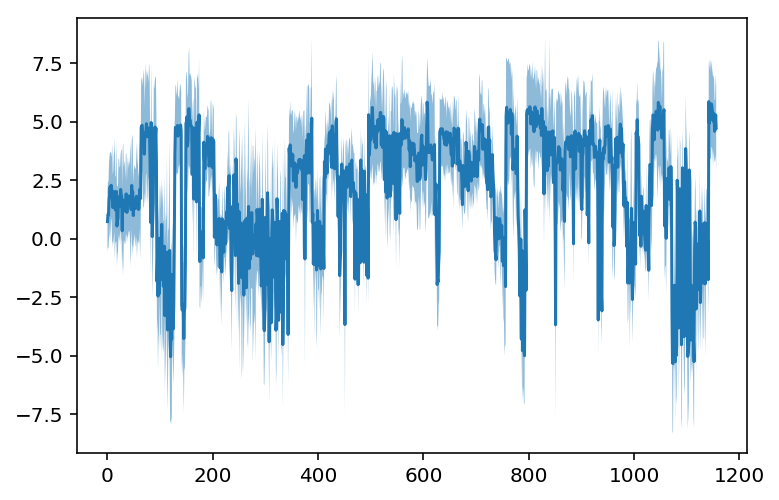

In [24]:
plt.plot(means)
plt.fill_between(np.arange(means.shape[0]), means - 2*np.sqrt(vars), means + 2*np.sqrt(vars), alpha=0.5)

In [28]:
from scipy.special import expit
samples = np.random.multivariate_normal(mean=means, cov=np.diag(vars), size=1000)
mean_probs = expit(samples).mean(axis=0)

In [29]:
from sklearn.metrics import log_loss

In [30]:
log_loss(test_outcomes, mean_probs)

0.23905333874723786

In [ ]:
# 0.227 in my other. So not perfect, but not terrible, either.